In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.linalg import cholesky, solve_triangular
from scipy.stats import norm
import pandas as pd
from IPython.display import display
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.optimize import fsolve

In [2]:
def find_covariance_matrix(image_size, fwhm_x, fwhm_y, pixel_scale=1.8):
    # Convert FWHM to sigma (standard deviation)
    sigma_x = fwhm_x / 2.355
    sigma_y = fwhm_y / 2.355
    
    x, y = np.meshgrid(np.arange(image_size), np.arange(image_size), indexing="ij")
    pixel_coords = np.stack((x.ravel(), y.ravel()), axis=1)
    
    # Convert pixel coordinates to sky coordinates
    ra = pixel_coords[:, 0] * pixel_scale * u.arcsec  # Convert to arcsec
    dec = pixel_coords[:, 1] * pixel_scale * u.arcsec  # Convert to arcsec
    
    # Create SkyCoord objects for all pixels
    sky_coords = SkyCoord(ra=ra, dec=dec, frame="icrs")
    
    # Compute the angular separation matrix
    d = sky_coords[:, None].separation(sky_coords[None, :]).arcsec  # Angular distance in arcseconds
    
    # Compute the anisotropic correlation matrix using the Gaussian function
    C = np.exp(-0.5 * (d**2 / sigma_x**2 + d**2 / sigma_y**2))
    
    # Set diagonal elements to 1 (as it's a correlation matrix)
    np.fill_diagonal(C, 1)
    
    return C

In [29]:
cmap = plt.cm.viridis.copy()  # Copy the viridis colormap
# Create a colormap where 0 is forced to white
cmap.set_bad(color='white')  # For masked values
cmap.set_under(color='white')  # For explicitly set zero values

In [30]:
image_size = 50
sigma =5.4/(2*(np.sqrt(2*np.log(2))))

In [ ]:
C = find_covariance_matrix(image_size, sigma)

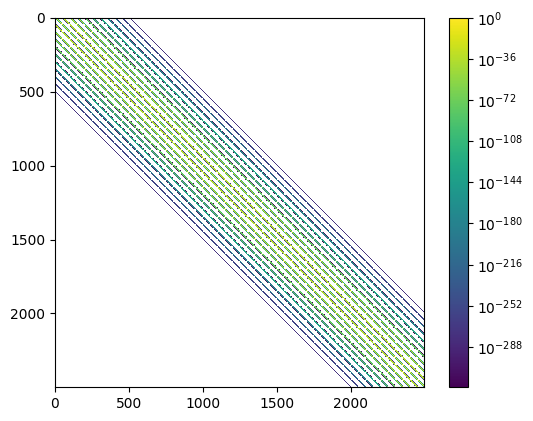

In [32]:
plt.imshow(C, cmap=cmap, interpolation='nearest',norm=LogNorm())
plt.colorbar()
plt.show()